<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Neural Networks with Keras

_Authors: Justin Pounders (ATL), Riley Dallas (ATX) and Adi Bronshtein (Live Online)_

---


### Learning Objectives

- Describe the basic `keras` workflow.
- Train regression and classification neural networks using `keras`

Before Keras was integrated into TensorFlow:
![](../assets/Keras&TensorFlow.jpg)

In [36]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification, make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import Recall

Now:
![](../assets/the-maths-deeplearning-import-keras.png)

# Regression
---

`make_regression` is an excellent library for generating a random regression problem. This helps us focus on the model without having to worry about the dataset. 

In the cell below, use `make_regression` to generate 10,000 samples using 20 features.

In [2]:
X, y = make_regression(n_samples=10000, n_features=20, random_state=42)

### Train/Test Split
---

We always want to have a validation set to test our model. Use the `train_test_split` function to split our `X` and `y` variables into a training set and a holdout set.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### `StandardScaler`
---

You want to scale your data for *any* model that uses Gradient Descent, which includes Neural Networks.

In [4]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

### Your first Neural Network!!
---
![](../assets/nn-topology.png)

Next stop, [The Singularity](https://en.wikipedia.org/wiki/Technological_singularity)!

Creating a model in `keras` entails a few steps:
1. Create your network topology
2. Compile your model
3. Fit your model

We'll cover each step in the cells below.

### Create your network topology
---

We'll create a simple network with:
- an input layer
- one hidden layer. As a general rule, you should use `'relu'` as your activation function for all hidden layers.
- an output layer. 

<details><summary><b>[THREAD]</b> Can you explain ReLU in your own words?</summary>
    Any number that comes out of the neuron that is equal to or lower than zero, the activation function returns zero; if the number is greater than zero, the ReLU function returns the number itself.  <img src=../assets/relu.png> 
    </details>  
  
For *all* regression problems, your output layer will be 1 neuron with *no* activation function (also known as an **Identity Function** or the **Linear Function**).  
![](../assets/identity-function.png)

---

In [5]:
model = Sequential() #Feedforward
model.add(Dense(32, # How many neurons do you want in your first layer.
                input_shape=(20,), # Number of input features
                activation='relu')) # Use relu activation for hidden layers
model.add(Dense(1)) # Output layer with 1 neuron and no activation for regression

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                672       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 705
Trainable params: 705
Non-trainable params: 0
_________________________________________________________________


In [7]:
32 * 20 + 32

672

### Compile your model
---

Whenever you compile your model, you have to specify a few things: 
1. What [loss function](https://keras.io/losses/) to use (depends on if it's regression, classification, etc)
2. What optimizer to use (Always use `'adam'`)
3. Optional: What additional [metrics](https://keras.io/metrics/) you'd like to monitor

In [8]:
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

### Fit your model
---

When fitting your model, you need to specify a few things:
1. The number of epochs: start with 10. Always easy to add more
2. Your batch size: pick a number that is a power of 2
3. Your validation data, which in this case is our test set.

In [9]:
model.fit(X_train_sc, y_train, validation_data=(X_test_sc, y_test), epochs=10, batch_size=512)

Epoch 1/10
15/15 [==============================] - 1s 12ms/step - loss: 40170.8633 - mae: 160.4679 - val_loss: 39351.8203 - val_mae: 158.8248
Epoch 2/10
15/15 [==============================] - 0s 4ms/step - loss: 40087.3320 - mae: 160.2986 - val_loss: 39269.3438 - val_mae: 158.6573
Epoch 3/10
15/15 [==============================] - 0s 5ms/step - loss: 40001.6445 - mae: 160.1264 - val_loss: 39184.3047 - val_mae: 158.4843
Epoch 4/10
15/15 [==============================] - 0s 4ms/step - loss: 39911.6914 - mae: 159.9448 - val_loss: 39091.3516 - val_mae: 158.2952
Epoch 5/10
15/15 [==============================] - 0s 4ms/step - loss: 39812.7305 - mae: 159.7439 - val_loss: 38988.5586 - val_mae: 158.0855
Epoch 6/10
15/15 [==============================] - 0s 4ms/step - loss: 39702.2031 - mae: 159.5190 - val_loss: 38870.6875 - val_mae: 157.8447
Epoch 7/10
15/15 [==============================] - 0s 4ms/step - loss: 39576.0273 - mae: 159.2614 - val_loss: 38735.8477 - val_mae: 157.5686
Epoch

### Model predictions
---

Your `keras` model has a `.fit()` method, similar to `sklearn`. The only difference is `keras` returns a 2D `numpy` matrix (`sklearn` returns a 1D `numpy` array).

Try it out in the cell below.

In [16]:
model.predict(X_test_sc)

array([[ 4.2835503],
       [ 3.5263448],
       [ 6.2168517],
       ...,
       [ 2.5593753],
       [ 4.231212 ],
       [-5.4835253]], dtype=float32)

In [18]:
model.evaluate(X_test_sc, y_test) # kind of like .score() in sklearn

79/79 [==============================] - 0s 1ms/step - loss: 38206.1133 - mae: 156.4750


[38206.11328125, 156.47500610351562]

# Binary Classification
---

`make_classification` is similar to `make_regression`, except now we're predicting a class (0 or 1).

In the cell below, use `make_classification` to generate 10,000 samples using 20 features.

In [19]:
X, y = make_classification(n_samples=10_000, n_features=20, random_state=42)

### Train/Test Split
---

We always want to have a validation set to test our model. Use the `train_test_split` function to split our `X` and `y` variables into a training set and a holdout set.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

### `StandardScaler`
---

You want to scale your data for *any* model that uses Gradient Descent, which includes Neural Networks.

In [21]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

### Network Topology for Binary Classification
---

We'll create a simple network with:
- an input layer, 
- one hidden layer. As a general rule, you should use `'relu'` as your activation function for all hidden layers.
- an output layer. 

For *all* binary classification problems, your output layer will be 1 neuron with `'sigmoid'` activation function. Sigmoid squashes the output of our neuron to a value between 0 and 1, which is great for predicting probabilities. We'll use the probability for our loss function in the next step. The **Sigmoid Function**:   
![](../assets/sigmoid.png)

In [56]:
model = Sequential()
model.add(Dense(32,
                input_shape=(20,),
                activation='relu'))
model.add(Dense(1, activation='sigmoid'))

### Compile your model
---

Whenever you compile your model, you have to specify a few things: 
1. What loss function to use: For binary classification, use `binary_crossentropy`. ([Description](https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html#cross-entropy))
2. What optimizer to use (Always use `'adam'`)
3. Optional: What additional [metrics](https://keras.io/metrics/) you'd like to monitor

In [57]:
model.compile(loss='binary_crossentropy',  optimizer='adam', metrics=['accuracy', Recall()])

### Fit your model
---

When fitting your model, you need to specify a few things:
1. The number of epochs: start with 10. Always easy to add more
2. Your batch size: pick a number that is a power of 2
3. Your validation data, which in this case is our test set.

When you fit a model, `keras` returns a `History` object. We need that in the next step, but for now, just save it to a variable.

In [58]:
history = model.fit(X_train_sc, y_train, validation_data=(X_test_sc, y_test), epochs=10, batch_size=32)

Epoch 1/10
235/235 [==============================] - 2s 5ms/step - loss: 0.5149 - accuracy: 0.7585 - recall_2: 0.7395 - val_loss: 0.3530 - val_accuracy: 0.8800 - val_recall_2: 0.8639
Epoch 2/10
235/235 [==============================] - 1s 4ms/step - loss: 0.3152 - accuracy: 0.8835 - recall_2: 0.8825 - val_loss: 0.2880 - val_accuracy: 0.8952 - val_recall_2: 0.8863
Epoch 3/10
235/235 [==============================] - 1s 4ms/step - loss: 0.2825 - accuracy: 0.8956 - recall_2: 0.9002 - val_loss: 0.2726 - val_accuracy: 0.9016 - val_recall_2: 0.8959
Epoch 4/10
235/235 [==============================] - 1s 4ms/step - loss: 0.2688 - accuracy: 0.9036 - recall_2: 0.9082 - val_loss: 0.2645 - val_accuracy: 0.9092 - val_recall_2: 0.8959
Epoch 5/10
235/235 [==============================] - 1s 4ms/step - loss: 0.2580 - accuracy: 0.9124 - recall_2: 0.9164 - val_loss: 0.2552 - val_accuracy: 0.9148 - val_recall_2: 0.9167
Epoch 6/10
235/235 [==============================] - 1s 4ms/step - loss: 0.2509

### Visualizing model training
---

Whenever you fit your `keras` model, it returns a `History` object ([link](https://keras.io/visualization/#training-history-visualization)) that can be used for plotting.

In [59]:
history_df = pd.DataFrame(history.history)
history_df

,loss,accuracy,recall_2,val_loss,val_accuracy,val_recall_2
0,0.514927,0.758533,0.739455,0.353031,0.8800,0.863891
1,0.315172,0.883467,0.882541,0.287985,0.8952,0.886309
2,0.282525,0.895600,0.900160,0.272633,0.9016,0.895917
3,0.268781,0.903600,0.908169,0.264525,0.9092,0.895917
4,0.258013,0.912400,0.916444,0.255184,0.9148,0.916733
5,0.250942,0.918533,0.925521,0.250796,0.9212,0.919135
6,0.245146,0.921467,0.926321,0.247346,0.9224,0.922338
7,0.241617,0.926400,0.932995,0.245387,0.9268,0.922338
8,0.238472,0.928000,0.934063,0.242381,0.9280,0.927942
9,0.235953,0.929333,0.936199,0.241414,0.9288,0.929544


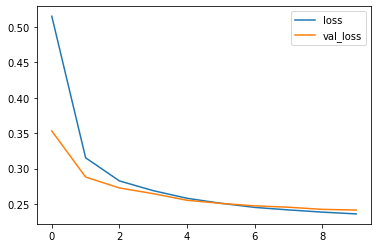

In [60]:
history_df.filter(like='loss').plot();

### Challenge
---

Using the `history` object, plot the model's accuracy (for both train and test).

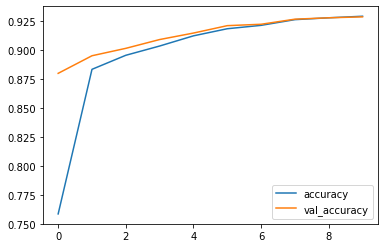

In [61]:
history_df.filter(like='accuracy').plot()
plt.legend(loc='lower right');

# Multi-class Classification
---

The `make_classification` function allows for multi-class problems as well. Simply increase the `n_classes` and voila!

**NOTE**: You'll need to increase `n_informative` as you increase `n_classes`.

In the cell below, let's create a dataset with three classes.

In [62]:
X, y = make_classification(n_samples=10000, n_features=20, n_informative=4, n_classes=3)

### One-hot Encoding Targets
---

In `keras`, you have to one-hot encode your `y` if it contains more than two classes. We'll use `keras`' built-in `to_categorical` function to achieve this.

In [63]:
y = to_categorical(y)
y[:5]

array([[0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

### Train/Test Split
---

We always want to have a holdout set to test our model. Use the `train_test_split` function to split our `X` and `y` variables into a training set and a holdout set.

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### `StandardScaler`
---

Use an instance of `StandardScaler` to scale your `X_train` and `X_test` in the cell below.

In [65]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

### Network Topology for Multi-class Classification
---

We'll create a simple network with:
- an input layer
- one hidden layer. As a general rule, you should use `'relu'` as your activation function for all hidden layers.
- an output layer

For *all* multi-class classification problems, your output layer will be the same number of neurons as the number of classes in your problem. The activation function will be `softmax`, which will normalize the predictions into probabilities that sum up to 1.0.

In [81]:
model = Sequential()
model.add(Dense(32, 
                input_shape=(20,),
                activation='relu'))
model.add(Dense(3, activation='softmax'))

### Compile your model
---

Whenever you compile your model, you have to specify a few things: 
1. What loss function to use: For multi-class classification, use `categorical_crossentropy`. ([Description](https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html#cross-entropy))
2. What optimizer to use (Always use `'adam'`)
3. Optional: What additional [metrics](https://keras.io/metrics/) you'd like to monitor

In [82]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Fit your model
---

When fitting your model, you need to specify a few things:
1. The number of epochs: start with 10. Always easy to add more
2. Your batch size: pick a number that is a power of 2
3. Your validation data, which in this case is our test set.

In [83]:
history = model.fit(X_train_sc, y_train, validation_data=(X_test_sc, y_test), epochs=20, batch_size=32, verbose=0)

### Visualizing model training
---

Whenever you fit your `keras` model, it returns a `History` object ([link](https://keras.io/visualization/#training-history-visualization)) that can be used for plotting.

In [84]:
history_df = pd.DataFrame(history.history)

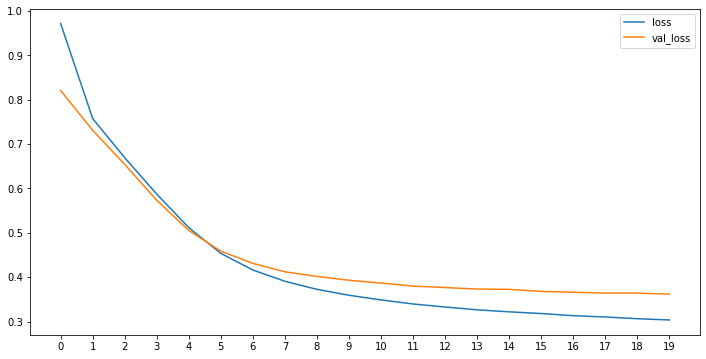

In [88]:
history_df.filter(like='loss').plot(xticks=history_df.index, figsize=(12,6), xlabel='epoch');

### Challenge
---

Using the `history` object, plot the model's accuracy (for both train and test).

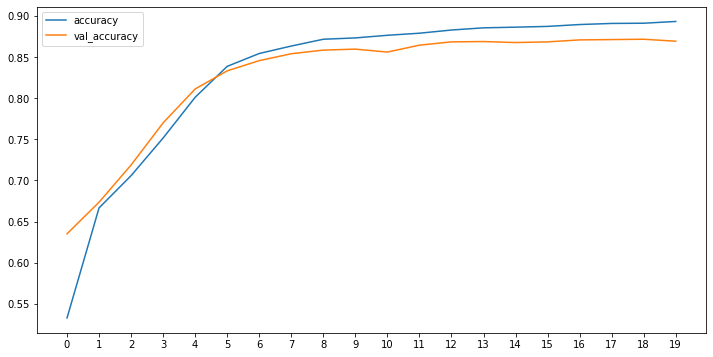

In [89]:
history_df.filter(like='accuracy').plot(xticks=history_df.index, figsize=(12,6), xlabel='epoch');

---
### Multiclass Classification WITHOUT One Hot Encoding

In [91]:
# remake X and y
X, y = make_classification(n_samples=10000, n_features=20, n_informative=4, n_classes=3)

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# scale X data
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [92]:
# set up model architecture
model = Sequential()
model.add(Dense(32, input_shape=(20,), activation='relu'))
model.add(Dense(3, activation='softmax'))

In [93]:
# compile model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [94]:
# fit model
history = model.fit(X_train_sc, y_train,
                    validation_data=(X_test_sc, y_test),
                    epochs=20,
                    batch_size=32,
                   )

Epoch 1/20
235/235 [==============================] - 1s 4ms/step - loss: 1.0450 - accuracy: 0.4711 - val_loss: 0.8602 - val_accuracy: 0.5964
Epoch 2/20
235/235 [==============================] - 1s 3ms/step - loss: 0.7935 - accuracy: 0.6380 - val_loss: 0.7502 - val_accuracy: 0.6676
Epoch 3/20
235/235 [==============================] - 1s 3ms/step - loss: 0.7096 - accuracy: 0.6933 - val_loss: 0.6868 - val_accuracy: 0.7064
Epoch 4/20
235/235 [==============================] - 1s 3ms/step - loss: 0.6441 - accuracy: 0.7299 - val_loss: 0.6304 - val_accuracy: 0.7308
Epoch 5/20
235/235 [==============================] - 1s 3ms/step - loss: 0.5883 - accuracy: 0.7628 - val_loss: 0.5863 - val_accuracy: 0.7512
Epoch 6/20
235/235 [==============================] - 1s 3ms/step - loss: 0.5455 - accuracy: 0.7876 - val_loss: 0.5577 - val_accuracy: 0.7696
Epoch 7/20
235/235 [==============================] - 1s 3ms/step - loss: 0.5169 - accuracy: 0.7997 - val_loss: 0.5324 - val_accuracy: 0.7856
Epoch 

In [96]:
# history
history_df = pd.DataFrame(history.history)

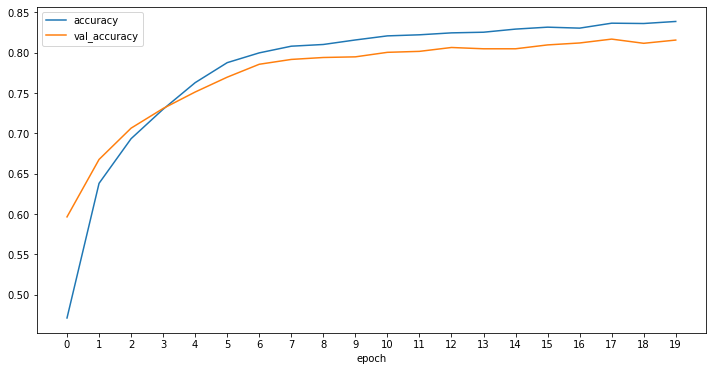

In [101]:
# plot accuracy vs epoch
history_df.filter(like='accuracy').plot(xticks=history_df.index, figsize=(12,6), xlabel='epoch');

Friends don't let friends add too many epochs:
![](../assets/add-more-epochs.png)